In [1]:
pip install finterstellar

     |████████████████████████████████| 109 kB 4.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import finterstellar as fs

In [20]:
terms = fs.set_terms(trade_start='2015Q1', trade_end='2015Q4')
terms

Index(['2014Q4', '2015Q1', '2015Q2', '2015Q3'], dtype='object')

In [21]:
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16482659151081211164', term=t)

2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK


In [22]:
for t in terms:
  data[t]['PER'] = data[t]['Price'] / data[t]['EPS']

In [25]:
s = {}
signal = {}
for t in terms:
  s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
  signal[t] = list(s[t].index)
  print(signal[t])

['PTMN', 'KBH', 'ITP', 'AIV', 'CTLP', 'AMBC', 'SPXC', 'GRBK', 'EMKR', 'OVV', 'FBP', 'GT', 'RDN', 'MBI', 'COWN', 'MTCH', 'XIN', 'SM', 'AGO', 'JOE', 'MIC', 'TGNA', 'BKCC', 'MOD', 'TRN', 'VOYA', 'MTW', 'IDT', 'REGI', 'NRZ']
['PTMN', 'KBH', 'WATT', 'AIV', 'AMBC', 'GT', 'ASPS', 'GIGM', 'FBP', 'COWN', 'CODI', 'GURE', 'AGO', 'VOC', 'RDN', 'GAIN', 'MTCH', 'MTOR', 'RAD', 'WW', 'MTW', 'WMC', 'MBI', 'TGNA', 'VOYA', 'ENTA', 'BKCC', 'OVV', 'HPQ', 'BPT']
['WATT', 'KBH', 'AIV', 'FRO', 'VC', 'CBAT', 'AGO', 'PTMN', 'FBP', 'GT', 'CODI', 'MBI', 'PAM', 'BPOP', 'RAD', 'MTCH', 'XIN', 'WW', 'COWN', 'TRN', 'IDT', 'GAIN', 'GLAD', 'SCHL', 'WRLD', 'RDN', 'MTW', 'CIM', 'VOYA', 'HPQ']
['BZH', 'AMBC', 'KBH', 'FRO', 'WATT', 'VC', 'WRLD', 'FBP', 'KEP', 'IMH', 'MTG', 'BAK', 'GT', 'AIV', 'RAD', 'ARC', 'UAL', 'EMKR', 'COWN', 'AGO', 'TRN', 'CPSS', 'BPOP', 'IDT', 'TGNA', 'AR', 'PAM', 'CSIQ', 'GAIN', 'TRTN']


In [26]:
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)

CAGR: 3.24%
Accumulated return: 2.44%
Investment period: 0.8yrs
Sharpe ratio: 0.11
MDD: -10.35%


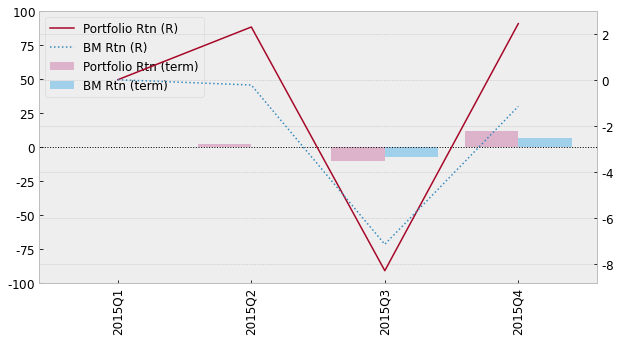

In [28]:
fs.draw_return(df)

In [32]:
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16482659151081211164', term=t)
s = {}
signal = {}
for t in terms:
  data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
  data[t]['PBR'] = data[t]['Price'] / data[t]['BPS']
  s[t] = fs.fn_filter(data[t], by='PBR', floor=1, cap=2, n=30, asc=True)
  signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)

2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
CAGR: -1.88%
Accumulated return: -1.42%
Investment period: 0.8yrs
Sharpe ratio: -0.41
MDD: -5.89%


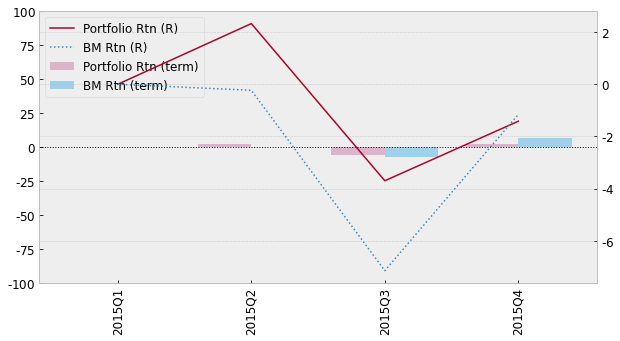

In [33]:
fs.draw_return(df)